# Step 1
Dobbiamo risistemare alcune cose della versione 1.01, in particolare dobbiamo fare dei fit  prima e dopo la selezione del probe, quindi un fit della ricostruzione fatta con $Z_{after}=\mu_{tag}+\mu_{PP}$ (e quindi dopo il taglio) sia un fit di $Z_{before}=\mu_{tag}+\mu_{AP}$, dove utilizzo tutti i probes, passing o meno che siano.
Inoltre dobbiamo correggere il fatto che abbiamo usato criteri decisamente troppo stringenti: utilizzerò i vecchi larghi come tag

In [1]:
import ROOT
import particle as pt
import numpy as np

Welcome to JupyROOT 6.26/04


In [2]:
fileDY = ROOT.TFile("./datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

file = ROOT.TFile("./datas/Data.root","OPEN")
tr = file.trees.events

**⚠** Non mi rifaccio i plot che ci hanno permesso di stabilire i taglio, per quelli consultare la versione 1.01, mi scrivo solo i tagli

| Caratteristica | Criterio stretto | Criterio largo |
| ------ | ----------- ||
| $\chi^2$   | $0.2<\chi^2<1.8$ | nada |
| $dz$ | $<0.005$ | $<0.009$|
| $dB$  | $<0.003$| $<0,006$ |
| $iso$  | $<4$ | $<9$ |

Warning in <TFile::Append>: Replacing existing TH1: DY_mu_mass_PP (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: DY_mu_mass_PP (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: DY_allprobes (Potential memory leak).


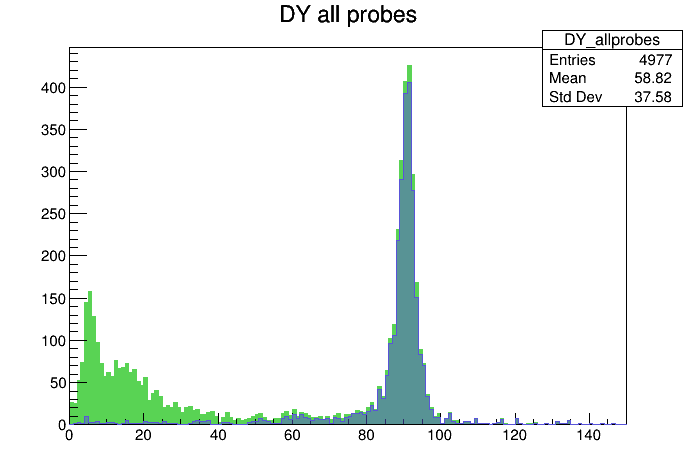

In [53]:
h_passing_probes = ROOT.TH1F("DY_mu_mass_PP","DY Muon mass PP",150,0,150) 
h_failing_probes = ROOT.TH1F("DY_mu_mass_PP","DY Muon mass PP",150,0,150) 
h_all_probes = ROOT.TH1F("DY_allprobes","DY all probes",150,0,150) 
c=ROOT.TCanvas()

n_pass = 0
n_fail = 0

for i in range(dytr.GetEntries()):
    dytr.GetEntry(i)
    if(dytr.muontracks_size>1):
        muons = pt.get_collection(dytr, "muontracks")
        for mi in range(len(muons)):
            if(dytr.muontracks_chi2[mi]<1.8 and dytr.muontracks_chi2[mi]>0.2 and dytr.muontracks_dz[mi]<0.005 and dytr.muontracks_dB[mi]<0.003 and dytr.muontracks_isoDeposits[mi]<4):
                p4t=muons[mi].p4
                for mj in range(len(muons)):
                    if(mj != mi):
                        p4ap=muons[mj].p4
                        s_all = (p4t+p4ap).M()
                        h_all_probes.Fill(s_all)
                        if(dytr.muontracks_dz[mj]<0.009 and dytr.muontracks_dB[mj]<0.006 and dytr.muontracks_isoDeposits[mj]<9):
                            p4pp=muons[mj].p4
                            s_pass = (p4t+p4pp).M()
                            h_passing_probes.Fill(s_pass)
                            #n_pass = n_pass +1
                        else:
                            p4fp=muons[mj].p4
                            s_fail = (p4t+p4fp).M()
                            h_failing_probes.Fill(s_fail)
                            #n_fail = n_fail +1
c.Draw()
h_all_probes.SetLineColor(8)
h_all_probes.SetFillColorAlpha(8,1)
h_all_probes.Draw()
h_passing_probes.SetLineColor(9)
h_passing_probes.SetFillColorAlpha(9,0.5)
h_passing_probes.Draw("SAME")


 FCN=567.723 FROM MIGRAD    STATUS=CONVERGED     245 CALLS         246 TOTAL
                     EDM=5.47356e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.06865e+01   5.75291e-02   7.66737e-04   8.41612e-03
   2  p1           3.17086e+00   7.64546e-02   5.65330e-04  -3.31546e-03
   3  p2           2.75900e+03   5.78460e+01   4.20257e-01   3.06429e-07
   4  p3           1.77624e+01   6.14952e-01  -1.34780e-03   1.69825e-03
   5  p4           2.30915e+03   6.00090e+01   3.26531e-01  -7.19191e-06
 FCN=600.023 FROM MIGRAD    STATUS=CONVERGED     237 CALLS         238 TOTAL
                     EDM=5.02212e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9

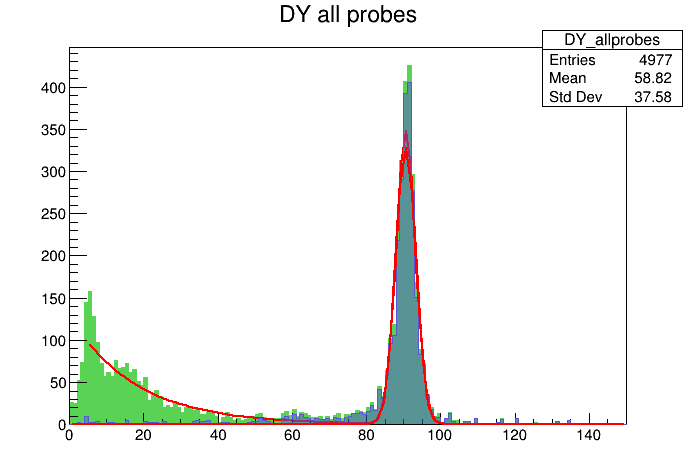

In [54]:
pp = ROOT.TF1("gauss", "[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-((x-[0])*(x-[0]))/(TMath::Sqrt(2)*[1]*[1]))", 5,140)
ap = ROOT.TF1("exp+gauss", "[4]/[3]*TMath::Exp(-x/[3]) + [2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-((x-[0])*(x-[0]))/(TMath::Sqrt(2)*[1]*[1]))", 5, 140)

pp.SetParameters(50,10,50)
ap.SetParameters(90,10,10,500,100)

h_all_probes.Fit(ap, "SR")
h_passing_probes.Fit(pp)

c.Draw()

In [55]:
n_ap=ap.Integral(5,140)
n_pp=pp.Integral(40,140)
print(n_ap, n_pp)
epsilon = n_pp/n_ap
print("Efficiency:", epsilon)

4061.7725025925606 2171.9819434939436
Efficiency: 0.5347374679669047
